In [1]:
from pandas import *
import datetime as dt
import matplotlib .dates as mdates
from matplotlib.pyplot import *

#importing the data and data cleaning
df = read_csv("specimenDate_ageDemographic-unstacked.csv", parse_dates=['date'])
df.drop(df.columns[25:], axis=1, inplace=True)
df["newCases-0_59"] = df["newCasesBySpecimenDate-0_4"] + \
df["newCasesBySpecimenDate-10_14"]+df["newCasesBySpecimenDate-25_29"]+\
df["newCasesBySpecimenDate-5_9"]+df["newCasesBySpecimenDate-15_19"]+\
df["newCasesBySpecimenDate-20_24"] +df["newCasesBySpecimenDate-0_59"]

df["newCases-60+"]  = df["newCasesBySpecimenDate-60+"] + \
df["newCasesBySpecimenDate-60_64"]+df["newCasesBySpecimenDate-65_69"]+\
df["newCasesBySpecimenDate-70_74"]+df["newCasesBySpecimenDate-75_79"]+\
df["newCasesBySpecimenDate-80_84"] +df["newCasesBySpecimenDate-85_89"]+\
df["newCasesBySpecimenDate-90+"]

df.drop(df.columns[4:25], axis =1 , inplace = True)

df["%change_newCases-0_59"] = df["newCases-0_59"].pct_change()
df["%change_newCases-0_60+"] = df["newCases-60+"].pct_change()
df["totalcases"] = df["newCases-0_59"] + df["newCases-60+"]
df["Day"] = df["date"].dt.day_name()
df["Month"] = df["date"].dt.month_name()
df.sort_values(by = "date", ascending = True, inplace = True)
df.head()


,areaType,areaCode,areaName,date,newCases-0_59,newCases-60+,%change_newCases-0_59,%change_newCases-0_60+,totalcases,Day,Month
3077,ltla,E06000014,York,2020-01-30,2,0,-0.970588,-1.0,2,Thursday,January
76034,overview,K02000001,United Kingdom,2020-01-30,3,0,-0.999801,-1.0,3,Thursday,January
76830,region,E12000003,Yorkshire and The Humber,2020-01-30,2,0,-0.999409,-1.0,2,Thursday,January
75757,nation,E92000001,England,2020-01-30,3,0,-0.909091,-1.0,3,Thursday,January
81746,utla,E06000014,York,2020-01-30,2,0,-0.970588,-1.0,2,Thursday,January


<AxesSubplot:xlabel='date'>

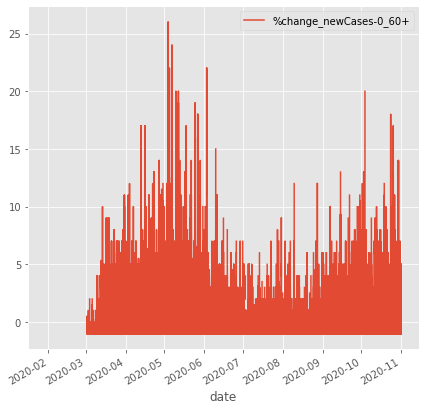

In [2]:
%matplotlib inline
style.use("ggplot")
fig,ax0 = subplots(figsize = (7,7))
ax0.xaxis_date()
df.plot(kind = "line", x = "date", y = "%change_newCases-0_60+", ax = ax0 )


In [3]:
df.dtypes

areaType                          object
areaCode                          object
areaName                          object
date                      datetime64[ns]
newCases-0_59                      int64
newCases-60+                       int64
%change_newCases-0_59            float64
%change_newCases-0_60+           float64
totalcases                         int64
Day                               object
Month                             object
dtype: object

In [8]:
df.isnull().sum()

areaType                      0
areaCode                      0
areaName                      0
date                          0
newCases-0_59                 0
newCases-60+                  0
%change_newCases-0_59     15734
%change_newCases-0_60+    32136
totalcases                    0
Day                           0
Month                         0
dtype: int64

<AxesSubplot:xlabel='Day'>

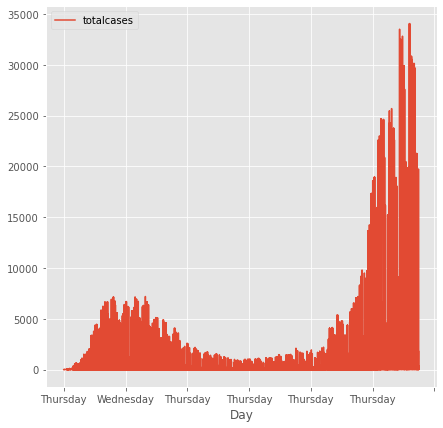

In [52]:
%matplotlib inline
style.use("ggplot")
fig,ax0 = subplots(figsize = (7,7))
df.plot(kind = "line", x = "Day", y = "totalcases", ax = ax0 )

<AxesSubplot:xlabel='date'>

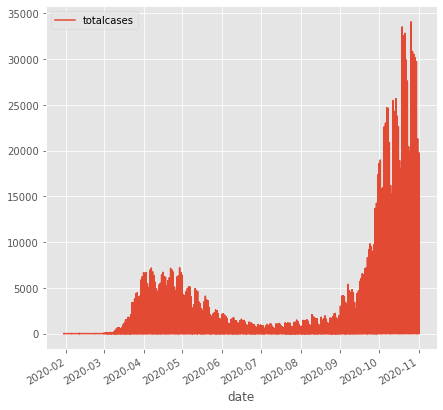

In [5]:
%matplotlib inline
style.use("ggplot")
fig,ax0 = subplots(figsize = (7,7))
ax0.xaxis_date()
df.plot(kind = "line", x = "date", y = "totalcases", ax = ax0 )

<AxesSubplot:xlabel='Month'>

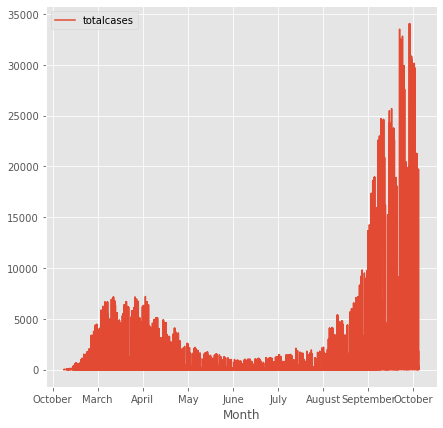

In [4]:
%matplotlib inline
style.use("ggplot")
fig,ax0 = subplots(figsize = (7,7))
ax0.xaxis_date()
df.plot(kind = "line", x = "Month", y = "totalcases", ax = ax0 )

Text(0.5, 1.0, 'Compare')

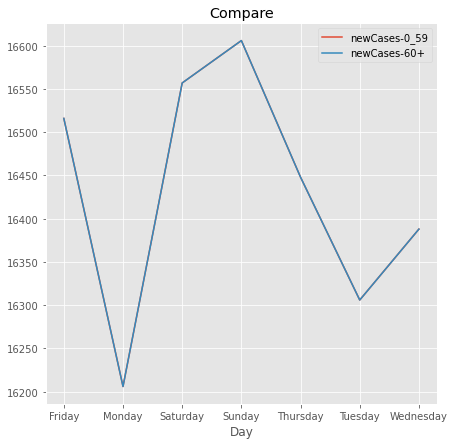

In [6]:
%matplotlib inline
groups = df.groupby(["Day"])[["newCases-0_59","newCases-60+"]].count()
style.use("ggplot")
fig,ax0 = subplots(figsize = (7,7))
groups.plot(kind = "line", ax = ax0 )
ax0.set_title("Compare")


In [1]:
from pandas import *
import datetime as dt
import matplotlib .dates as mdates
from matplotlib.pyplot import *
df = read_csv("specimenDate_ageDemographic-unstacked.csv", parse_dates=['date'])
df.drop(df.columns[25:], axis=1, inplace=True)

In [2]:
df.columns

Index(['areaType', 'areaCode', 'areaName', 'date',
       'newCasesBySpecimenDate-0_4', 'newCasesBySpecimenDate-0_59',
       'newCasesBySpecimenDate-10_14', 'newCasesBySpecimenDate-15_19',
       'newCasesBySpecimenDate-20_24', 'newCasesBySpecimenDate-25_29',
       'newCasesBySpecimenDate-30_34', 'newCasesBySpecimenDate-35_39',
       'newCasesBySpecimenDate-40_44', 'newCasesBySpecimenDate-45_49',
       'newCasesBySpecimenDate-50_54', 'newCasesBySpecimenDate-55_59',
       'newCasesBySpecimenDate-5_9', 'newCasesBySpecimenDate-60+',
       'newCasesBySpecimenDate-60_64', 'newCasesBySpecimenDate-65_69',
       'newCasesBySpecimenDate-70_74', 'newCasesBySpecimenDate-75_79',
       'newCasesBySpecimenDate-80_84', 'newCasesBySpecimenDate-85_89',
       'newCasesBySpecimenDate-90+'],
      dtype='object')

In [4]:
df.columns[4:25]

Index(['newCasesBySpecimenDate-0_4', 'newCasesBySpecimenDate-0_59',
       'newCasesBySpecimenDate-10_14', 'newCasesBySpecimenDate-15_19',
       'newCasesBySpecimenDate-20_24', 'newCasesBySpecimenDate-25_29',
       'newCasesBySpecimenDate-30_34', 'newCasesBySpecimenDate-35_39',
       'newCasesBySpecimenDate-40_44', 'newCasesBySpecimenDate-45_49',
       'newCasesBySpecimenDate-50_54', 'newCasesBySpecimenDate-55_59',
       'newCasesBySpecimenDate-5_9', 'newCasesBySpecimenDate-60+',
       'newCasesBySpecimenDate-60_64', 'newCasesBySpecimenDate-65_69',
       'newCasesBySpecimenDate-70_74', 'newCasesBySpecimenDate-75_79',
       'newCasesBySpecimenDate-80_84', 'newCasesBySpecimenDate-85_89',
       'newCasesBySpecimenDate-90+'],
      dtype='object')